# Time-Optimal Gates

First, we aim to find the fastest possible pulse realizing a CZ gate on two atoms in the perfect Rydberg blockade regime (for a fixed number of 4 pulse parameters).
For this, we perform many random initializations of pulse parameters, optimize the pulses, and identify the fastest pulse that realizes the gate with a fidelity better our target fidelity.

In [1]:
# %pip install -q --progress-bar off rydopt # Uncomment for installation on Colab

import rydopt as ro
import numpy as np

First, we create the target gate object and the pulse ansatz. The Rydberg decay strength is set to zero.

In [2]:
gate = ro.gates.TwoQubitGate(phi=None, theta=np.pi, Vnn=float("inf"), decay=0.0)
pulse_ansatz = ro.pulses.PulseAnsatz(
    detuning_ansatz=ro.pulses.const, phase_ansatz=ro.pulses.sin_crab
)

Then we specify upper and lower bounds for the random initialization of pulse parameters.

In [3]:
min_initial_params = (6, [-1], [-1, -1], [])
max_initial_params = (10, [1], [1, 1], [])

We perform 60 random parameter initializations, running in parallel on 4 CPU cores. We decide to return the optimization history of all runs.

In [4]:
opt_result = ro.optimization.multi_start_optimize(
    gate,
    pulse_ansatz,
    min_initial_params,
    max_initial_params,
    num_steps=300,
    tol=1e-8,
    num_initializations=60,
    num_processes=4,
    return_history=True,
    return_all=True,
)


Started optimization using 4 processes



proc01:   0%|                                                                                            | 0/3…

proc00:   0%|                                                                                            | 0/3…

proc02:   0%|                                                                                            | 0/3…

proc03:   0%|                                                                                            | 0/3…


=== Optimization finished using multi-start Adam ===

Duration: 22.567 seconds
Gates with infidelity below tol=1.0e-08: 60

Slowest gate:
> infidelity <= tol
> parameters = (9.833979958476096, [0.82702066], [0.51842276 1.79759886], [])
> duration = 9.833979958476096

Fastest gate:
> infidelity <= tol
> parameters = (7.612273397932692, [0.06915121], [1.39724277 0.62476669], [])
> duration = 7.612273397932692
> one-sided bootstrap error on duration: 0.001


Finally, we plot the history of all optimization runs.

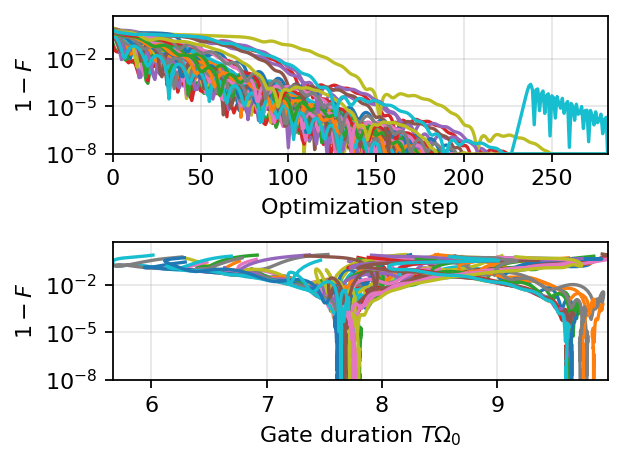

In [5]:
ro.characterization.plot_optimization_history(opt_result);

Now, we aim to find a gate pulse that minimizes the Rydberg time for a CZ gate on two atoms in the perfect Rydberg blockade regime (for a fixed number of 4 pulse parameters).
Again, we perform many random initializations of pulse parameters, optimize the pulses in the presence of Rydberg-state decay, and identify the pulse that performs best.

Specify the target gate *with* decay

In [6]:
gate_with_decay = ro.gates.TwoQubitGate(
    phi=None, theta=np.pi, Vnn=float("inf"), decay=0.0001
)

Perform 60 random parameter initializations, running in parallel on 4 CPU cores.

In [7]:
opt_result_with_decay = ro.optimization.multi_start_optimize(
    gate_with_decay,
    pulse_ansatz,
    min_initial_params,
    max_initial_params,
    num_steps=300,
    tol=1e-8,
    num_initializations=60,
    num_processes=4,
)


Started optimization using 4 processes



proc02:   0%|                                                                                            | 0/3…

proc03:   0%|                                                                                            | 0/3…

proc00:   0%|                                                                                            | 0/3…

proc01:   0%|                                                                                            | 0/3…


=== Optimization finished using multi-start Adam ===

Duration: 23.301 seconds
Gates with infidelity below tol=1.0e-08: 0

Best gate:
> infidelity = 2.937530e-04
> parameters = (7.7017422046784105, [-0.12083549], [0.16146116 0.90446749], [])
> duration = 7.7017422046784105


Finally, we analyze the best performing gate.

In [8]:
optimized_params_with_decay = opt_result_with_decay.params
infidelity, infidelity_nodecay, ryd_time = ro.characterization.analyze_gate(
    gate_with_decay, pulse_ansatz, optimized_params_with_decay
)

print(f"Gate infidelity:             {infidelity:.4e}")
print(f"Gate infidelity (no decay):  {infidelity_nodecay:.4e}")
print(f"Rydberg time:                {ryd_time:.4f}")

Gate infidelity:             2.9375e-04
Gate infidelity (no decay):  4.2895e-09
Rydberg time:                2.9380
